In [1]:
# Nativos
import random as rn
import os
import sys
import gc

#calculo
import numpy as np
import pandas as pd
import scipy

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")

#warning ignore future
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
gc.collect()

SEED = 29082013
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

sub_folder = 'data/Aplicativo TRB/'

In [8]:
data = pd.read_csv('MCSS-MOVIL/MCSS - Servidores relacionados a INC_3254793.csv', sep = ',', header=None).sort_values(
    by=[0]
)
data.head()

,0,1,2,3,4,5
1098626,2019-08-01 00:00:00.000,custdb01,custdb01,QOS_COMPUTER_UPTIME,44472989.00,60.0
1098627,2019-08-01 00:00:00.000,custdb02,custdb02,QOS_COMPUTER_UPTIME,1557568.00,60.0
4145,2019-08-01 00:00:31.000,custdb01,/boot,QOS_DISK_USAGE_PERC,11.22,5.0
972,2019-08-01 00:00:31.000,custdb01,/backup,QOS_DISK_USAGE_PERC,22.27,5.0
4075,2019-08-01 00:00:31.000,custdb01,/dev/shm,QOS_DISK_USAGE_PERC,0.03,5.0


In [9]:
data.tail()

,0,1,2,3,4,5
964474,2019-10-24 02:01:46.000,custdb01,/oradp,QOS_DISK_USAGE_PERC,45.40,5.000000
942611,2019-10-24 02:01:46.000,custdb01,/ora_oem,QOS_DISK_USAGE_PERC,7.82,5.000000
1370793,2019-10-24 02:02:45.000,custdb02,CDC_PRDCUST,QOS_PROCESS_STATE,1.00,0.983333
1370794,2019-10-24 02:03:44.000,custdb02,CDC_PRDCUST,QOS_PROCESS_STATE,1.00,0.983333
1370795,2019-10-24 02:04:43.000,custdb02,CDC_PRDCUST,QOS_PROCESS_STATE,1.00,0.983333


In [2]:
columns_servidores = ['tiempo','servidor','path', 'metrica', 'value', 'muestreo']

In [3]:
def read_servidores(csv_name):
    data = pd.read_csv(csv_name, sep = ',', header = None)
    data.columns = columns_servidores
    
    data['tiempo'] = pd.to_datetime(data['tiempo'])
    data = data.sort_values(by=['tiempo'], ascending=True)

    data.set_index('tiempo', inplace=True)
    data['date'] = data.index
    return data


def read_incidencias(excel_name):
    data = pd.read_excel(excel_name)
    
    #data['tiempo'] = data['Fecha'].astype(str) + ' ' + data['HORA INICIO'].astype(str)
    
    #data['tiempo'] = pd.to_datetime(
    #    data['tiempo'],errors='coerce',format='%Y/%m/%d %H:%M:%S'
    #)
    
    #data = data.sort_values(by=['tiempo'])
    #data.set_index('tiempo', inplace=True)
    
    return data

In [4]:
servidores = read_servidores(sub_folder +'TRB - Servidores - Colas Demonios - Agosto - Enero.csv')
servidores.head()

,servidor,path,metrica,value,muestreo,date
tiempo,,,,,,
2019-08-02 00:00:00,prd01bl,prd01bl,QOS_COMPUTER_UPTIME,93770418.0,60.0,2019-08-02 00:00:00
2019-08-02 00:00:00,caapmvmwlnxv13,caapmvmwlnxv13.lnx.gp.inet,QOS_COMPUTER_UPTIME,73237487.0,60.0,2019-08-02 00:00:00
2019-08-02 00:00:31,prd01bl,AR1DDFEEDBACK,QOS_PROCESS_STATE,1.0,1.0,2019-08-02 00:00:31
2019-08-02 00:00:31,prd01bl,MSD415,QOS_PROCESS_STATE,1.0,1.0,2019-08-02 00:00:31
2019-08-02 00:00:31,prd01bl,AR9NTFYOMS_01_1,QOS_PROCESS_STATE,1.0,1.0,2019-08-02 00:00:31


In [5]:
servidores['servidor'].value_counts(dropna=False)

prd01bl           13924860
caapmvmwlnxv13     1572283
Name: servidor, dtype: int64

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

servidores.groupby(
    by=['servidor', 'metrica', 'path']
).agg({
    'value': 'size',
    'date': ['max', 'min']
})

value                date                    
                                                                   size                 max                 min
servidor       metrica               path                                                                      
caapmvmwlnxv13 QOS_COMPUTER_UPTIME   caapmvmwlnxv13.lnx.gp.inet    4350 2020-01-30 15:00:00 2019-08-02 00:00:00
               QOS_CPU_USAGE         caapmvmwlnxv13.lnx.gp.inet   52365 2020-01-30 15:36:56 2019-08-02 00:04:39
               QOS_DISK_USAGE_PERC   /                            52379 2020-01-30 15:31:56 2019-08-02 00:04:39
                                     /apm                         52402 2020-01-30 15:31:56 2019-08-02 00:04:39
                                     /boot                        52392 2020-01-30 15:31:56 2019-08-02 00:04:39
                                     /dev                         52397 2020-01-30 15:31:56 2019-08-02 00:04:39
                                     /dev/shm                     52394 2020-01-30 15:31:56 2019-08-02 00:04:39
                                     /home                        52391 2020-01-30 15:31:56 2019-08-02 00:04:39
                                     /smartstor                   52400 2020-01-30 15:31:56 2019-08-02 00:04:39
                                     /tmp                         52386 2020-01-30 15:31:56 2019-08-02 00:04:39
                                     /trace                       52399 2020-01-30 15:31:56 2019-08-02 00:04:39
                                     /usr                         52386 2020-01-30 15:31:56 2019-08-02 00:04:39
                                     /var                         52379 2020-01-30 15:31:56 2019-08-02 00:04:39
               QOS_MEMORY_PAGING     caapmvmwlnxv13.lnx.gp.inet   52368 2020-01-30 15:31:56 2019-08-02 00:04:39
               QOS_MEMORY_PERC_USAGE caapmvmwlnxv13.lnx.gp.inet   52368 2020-01-30 15:36:56 2019-08-02 00:04:39
               QOS_MEMORY_SWAP_PERC  caapmvmwlnxv13.lnx.gp.inet   52377 2020-01-30 15:36:56 2019-08-02 00:04:39
               QOS_PROCESS_CPU       Collector 10                260731 2020-01-30 15:43:35 2019-08-02 00:00:56
               QOS_PROCESS_MEMORY    Collector 10                260716 2020-01-30 15:42:35 2019-08-02 00:00:56
               QOS_PROCESS_STATE     Collector 10                260703 2020-01-30 15:42:35 2019-08-02 00:00:56
prd01bl        QOS_COMPUTER_UPTIME   prd01bl                       4363 2020-01-30 15:00:00 2019-08-02 00:00:00
                                     prd01bl.gp.inet                  4 2019-09-28 16:00:00 2019-09-28 13:00:00
               QOS_CPU_USAGE         prd01bl                      52521 2020-01-30 15:36:33 2019-08-02 00:03:22
                                     prd01bl.gp.inet                 53 2019-09-28 16:59:36 2019-09-28 12:39:35
               QOS_DISK_USAGE_PERC   /                            52584 2020-01-30 15:31:33 2019-08-02 00:03:22
                                     /amdocs                      52600 2020-01-30 15:31:33 2019-08-02 00:03:22
                                     /apps                        52598 2020-01-30 15:31:33 2019-08-02 00:03:22
                                     /boot                        52593 2020-01-30 15:31:33 2019-08-02 00:03:22
                                     /data2                       52581 2020-01-30 15:31:33 2019-08-02 00:03:22
                                     /dev                         52593 2020-01-30 15:31:33 2019-08-02 00:03:22
                                     /dev/shm                     52593 2020-01-30 15:31:33 2019-08-02 00:03:22
                                     /opt                         52593 2020-01-30 15:31:33 2019-08-02 00:03:22
                                     /opt/controlm                52604 2020-01-30 15:31:33 2019-08-02 00:03:22
                                     /opt/controlmbackup          52603 2020-01-30 15:31:33 2019-08-02 00:03:22
                                  

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


servidores[
    (servidores['metrica'] == 'QOS_CPU_USAGE') & 
    (servidores['servidor'] == 'caapmvmwlnxv13') & 
    (servidores['path'] == 'caapmvmwlnxv13.lnx.gp.inet') 
]

,servidor,path,metrica,value,muestreo,date
tiempo,,,,,,
2019-08-02 00:04:39,caapmvmwlnxv13,caapmvmwlnxv13.lnx.gp.inet,QOS_CPU_USAGE,1.29,5.0,2019-08-02 00:04:39
2019-08-02 00:09:39,caapmvmwlnxv13,caapmvmwlnxv13.lnx.gp.inet,QOS_CPU_USAGE,1.06,5.0,2019-08-02 00:09:39
2019-08-02 00:14:39,caapmvmwlnxv13,caapmvmwlnxv13.lnx.gp.inet,QOS_CPU_USAGE,1.06,5.0,2019-08-02 00:14:39
2019-08-02 00:19:39,caapmvmwlnxv13,caapmvmwlnxv13.lnx.gp.inet,QOS_CPU_USAGE,1.17,5.0,2019-08-02 00:19:39
2019-08-02 00:24:39,caapmvmwlnxv13,caapmvmwlnxv13.lnx.gp.inet,QOS_CPU_USAGE,1.18,5.0,2019-08-02 00:24:39
...,...,...,...,...,...,...
2020-01-30 15:16:56,caapmvmwlnxv13,caapmvmwlnxv13.lnx.gp.inet,QOS_CPU_USAGE,3.60,5.0,2020-01-30 15:16:56
2020-01-30 15:21:56,caapmvmwlnxv13,caapmvmwlnxv13.lnx.gp.inet,QOS_CPU_USAGE,3.58,5.0,2020-01-30 15:21:56
2020-01-30 15:26:56,caapmvmwlnxv13,caapmvmwlnxv13.lnx.gp.inet,QOS_CPU_USAGE,3.58,5.0,2020-01-30 15:26:56


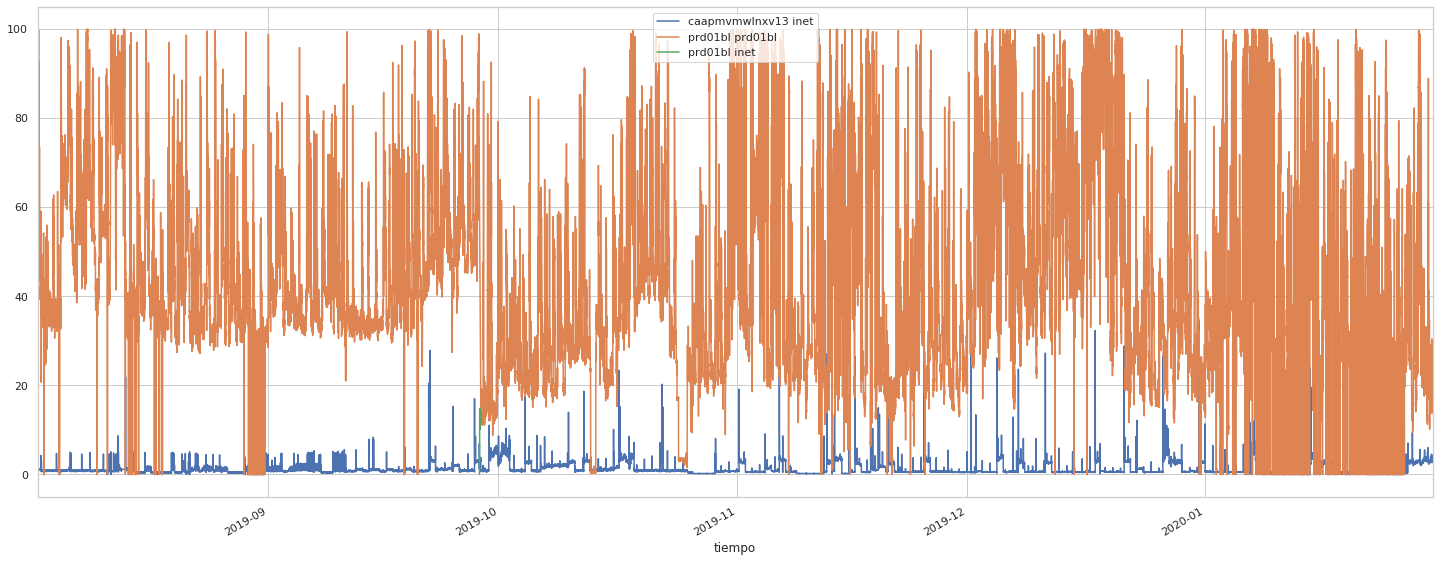

In [13]:
%matplotlib inline

metrica_cpu = 'QOS_CPU_USAGE'
servidores_group_cpu = servidores[
    servidores['metrica'] == metrica_cpu
].groupby(['servidor','metrica','path'])


for _group in servidores_group_cpu.groups.keys():
    _servidor, _metrica, _path = _group
    label = _servidor + ' ' + _path.split('.')[-1]
    
    servidores_group_cpu.get_group(_group).rename(columns={"value": label})[label].plot(
        legend=True, figsize=(25, 10), 
    )

////////// caapmvmwlnxv13 inet
////////// prd01bl prd01bl
////////// prd01bl inet


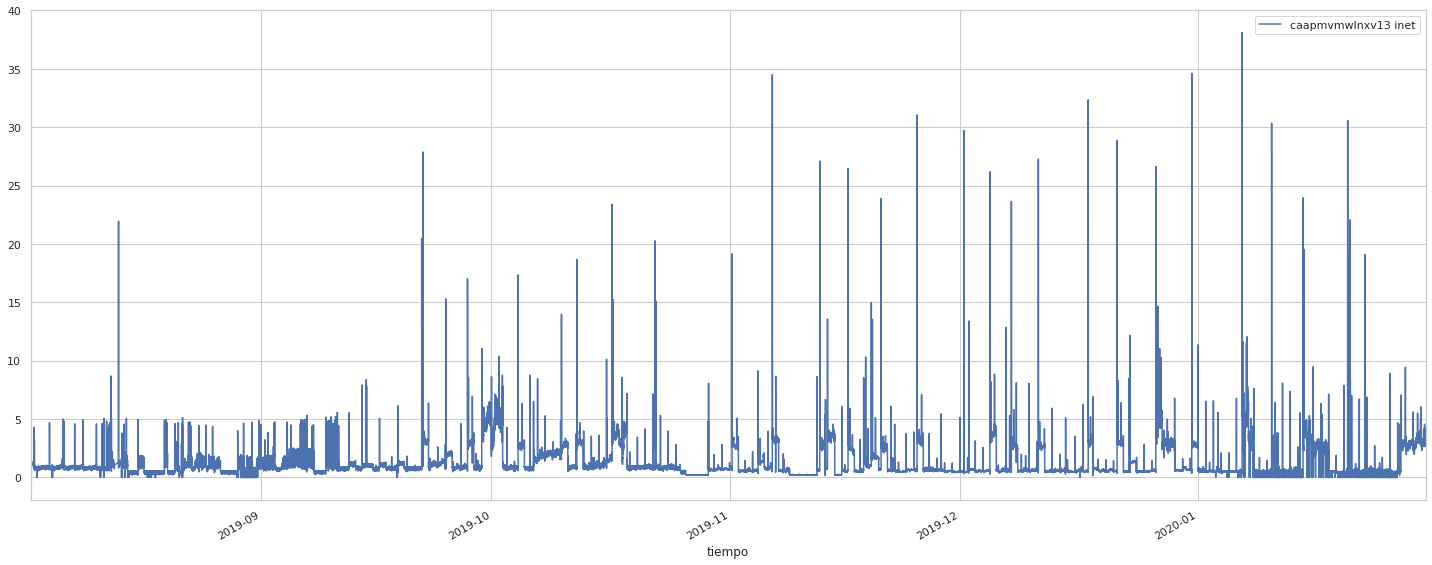

In [11]:
%matplotlib inline
for _group in servidores_group.groups.keys():
    _servidor, _metrica, _path = _group
    #print(_metrica)
    #if (_metrica != 'QOS_COMPUTER_UPTIME' and _metrica != 'QOS_MEMORY_PAGING') and _servidor == 'sun6c52':
    #if _metrica != 'QOS_COMPUTER_UPTIME' and _metrica != 'QOS_MEMORY_PAGING':
    #if _servidor == 'prd01bl' and _metrica == 'QOS_DISK_USAGE_PERC' and _path == '/':
    if _metrica == 'QOS_CPU_USAGE':
        label = _servidor + ' ' + _path.split('.')[-1]
        print("/"*10, label)
        if label.endswith('inet') and label.startswith('caapmvmwlnxv13'):
            servidores_group.get_group(_group).rename(columns={"value": label})[label].plot(
                legend=True, figsize=(25, 10), 
            )
        #print(help(servidores_group.get_group(_group)['value'].plot))
        
        #servidores_group.get_group(_group)['value'].plot(
        #    label= _metrica+' '+_servidor+' '+_path)
        #_df['tiempo'] = pd.to_datetime(_df['tiempo'])
        #_df.set_index('tiempo', inplace=True)
        
# incidencias


#ax.legend(loc='upper right')
#plt.suptitle('CMS', fontsize=30)

In [13]:
incidencias = read_incidencias(sub_folder+'TRB - Lista de Alertas e Incidencias.xlsx')
incidencias.head()

,ID de la incidencia*+,Apellidos+,Nombre+,Ubicación del cliente,Resumen*,Servicio*+,Prioridad*,Estado*,Grupo asignado*+,Usuario asignado+,Fecha deseada,Estado SLM en tiempo real,MES,Fecha de envío,Cantidad de usuarios afectados,Fecha Ultima Resolucion,Fecha de cierre,Correo electrónico del usuario asignado,Teléfono del usuario asignado,Origen,Apellido del contacto directo,CI+,Calle,Calle del contacto directo,Causa,Central de correo,Central de correo del contacto directo,Ciudad,Ciudad del contacto directo,Correo electrónico de Internet del contacto directo,Correo electrónico de cliente,Creado de plantilla,Crear petición,Código de área del contacto directo,Código del país del contacto directo,Código postal,Código postal del contacto directo,Datos de Remitente,Departamento del contacto directo,Detalles adicionales de la ubicación,Detalles de ubicación del contacto directo,Empresa del contacto directo,Empresa*+,Entrante:,Estado o provincia,Estado/provincia del contacto directo,Fabricante,Fabricante (R),Falla,Falla.1,Fecha de notificación+,Fecha de respuesta+,Fecha de última modificación,Fecha y hora de resolución requeridas,Fuente reportada,Grupo de localidades,Grupo de localidades del contacto directo,Grupo de propietarios+,Grupo de proveedores+,Huso horario,ID Corporativo (CIP),ID corporativo de contacto directo,ID de entrada,ID de persona de contacto directa,ID de petición de servicio,Id. de localidad del contacto directo,Impacto*,Indicador de difusión,Inicial del segundo nombre del contacto directo,Interno del contacto directo,Kickback_Count,Last_Kickback_Date,Modelo/Versión (R),Modelo/versión,Nivel 1,Nivel 1.1,Nivel 1 categoriz. de producto,Nivel 1 de categorización operacional,Nivel 2,Nivel 2.1,Nivel 2 categoriz. de producto,Nivel 2 de categorización operacional,Nivel 3,Nivel 3.1,Nivel 3 categoriz. de producto,Nivel 3 de categorización operacional,Nombre del contacto directo,Nombre del producto (R),Nombre del producto+,Notas,Nº ticket proveedor,Número local del contacto directo,Organización del contacto directo,Origen del cierre,País,País del contacto directo,Piso de cliente,Prioridad de SLM,Propietario,Remitente*,Resolución,Respuesta,Retención de OLA,Retención de SLA,Rol de grupo de soporte,Saliente:,Segundo nombre,Sensibilidad,Status-PPL,Status_Reason_Hidden,TEFPERU_LastAssignedCompanyforWL,TEFPERU_LastAssignedGroup,TEFPERU_LastAssignedGroupID,TEFPERU_LastAssignedGroupName,TEFPERU_LastAssignedGroupNameforWL,TEFPERU_LastAssignedOrganizationforWL,TEFPERU_LastAssignee,TEFPERU_LastAssigneeName,Teléfono de contacto+,Teléfono del cliente*+,Tiempo de esfuerzo invertido en minutos,Tipo de asociación de incidencias,Tipo de cliente,Tipo de incidencia*,Tipo de ticket,Ubicación de asistencia del contacto directo,Ubicación del contacto,Urgencia*,Usuario desconocido,VIP,Zona,Zona del contacto directo,Zona horaria del contacto directo,Última modificación por
0,INC000003495219,RAZURI CASTRO,LUZ ANDREA,Site Name por defecto,caapmvmwlnxv13 - ALERTADO,NaN,Baja,Cerrado,Operaciones,EDISON MURILLO VILLANUEVA,NaN,NaN,NaN,28/11/2019 01:58:21 p.m.,NaN,28/11/2019 07:50:08 p.m.,05/12/2019 09:02:32 p.m.,edison.murillo.villanueva@everis.com,###,NaN,NaN,CAAPMVMWLNXV13,Calle por defecto,NaN,NaN,NaN,NaN,Lima,NaN,NaN,luz.razuri@telefonica.com,No,No,NaN,NaN,NaN,NaN,SERGIO ANTONIO LEON MATOS,NaN,NaN,NaN,NaN,Telefónica Del Perú S.A.A.,5,Lima,NaN,NaN,NaN,NaN,NaN,28/11/2019 01:56:20 p.m.,28/11/2019 01:56:20 p.m.,06/12/2019 07:36:04 p.m.,NaN,NaN,NaN,NaN,Gestel,NaN,NaN,10721800.0,NaN,INC000001555545,NaN,NaN,NaN,3-Moderado/Limitado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,+Simple,IT Midrange,NaN,NaN,Turbo Charging,Servidores,NaN,NaN,TC Procesamiento de eventos,Unix,NaN,NaN,NaN,NaN,"Por favor, su apoyo para la revisión de la sig...",NaN,NaN,NaN,Sistema,Peru,NaN,TELEFONICA,Baja,NaN,sleonm,Se realizo el reinicio del demonio,Sí,No,No,Nivel 2,0,NaN,Sensible,Activado,Resolución autom. notificada,Everis Peru S.A.C.,28/11/2019 01:58:21 p.m.,SGP000000026072,Everis Peru S.A.C./Proy

In [30]:
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import SeasonalAD
from adtk.detector import AutoregressionAD
from adtk.detector import GeneralizedESDTestAD

In [34]:
r = ('prd01bl', 'QOS_CPU_USAGE', 'prd01bl')
s_train = servidores_group.get_group(r).copy()['value']
s_train.head(3)

tiempo
2019-08-02 00:03:22    73.58
2019-08-02 00:08:22    65.32
2019-08-02 00:13:22    60.94
Name: value, dtype: float64

In [36]:
esd_ad = GeneralizedESDTestAD(alpha=0.3)
anomalies = esd_ad.fit_detect(s_train)
plot(s_train, anomaly_pred=anomalies, ts_linewidth=2, ts_markersize=3, ap_markersize=5, ap_color='red', ap_marker_on_curve=True);

In [37]:
seasonal_ad = SeasonalAD(freq=288)
anomalies = seasonal_ad.fit_detect(s_train)
anomalies
#plot(s_train, anomaly_pred=anomalies, ap_color='red', ap_marker_on_curve=True)

RuntimeError: Series does not follow any known frequency (e.g. second, minute, hour, day, week, month, year, etc.